In [15]:
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
import warnings
warnings.filterwarnings ('ignore')

In [16]:
df = pd.read_excel('Dataset.xlsx')

In [17]:
df.head(10)

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22
5,1006,Samuel Cordova,65,Female,West Nichole,zachary56@example.net,001-333-812-1313x1564,"723 Ellis Cliffs\nWilliamchester, AK 78120",Segment A,"[{'Product': 'Watering Can Accesssories', 'Fre...",...,"[{'Type': 'Email', 'Date': '2020-12-21'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 34...","{'PageViews': 40, 'TimeSpent(minutes)': 17}","[{'Action': 'Click', 'Page': 'author', 'Timest...","{'Logins': 23, 'Frequency': 'Daily'}","{'Rating': 2, 'Comment': 'Next admit yes adult...","[{'Email_Sent': '2022-10-21', 'Email_Opened': ...",2,1,2020-03-25 22:44:33
6,1007,Wesley Turner,52,Female,Emilyland,brookekrause@example.net,623.025.4444x899,"93854 Patricia Inlet Apt. 323\nJohnburgh, MS 6...",Segment B,"[{'Product': 'Paint Shakers', 'Frequency': 3, ...",...,"[{'Type': 'Chat', 'Date': '2020-05-20'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 24...","{'PageViews': 23, 'TimeSpent(minutes)': 25}","[{'Action': 'Cli

In [18]:
missing_values = df.isnull().sum()

In [19]:
missing_values

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

In [20]:
df.duplicated().any()

False

In [21]:
df.describe()

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


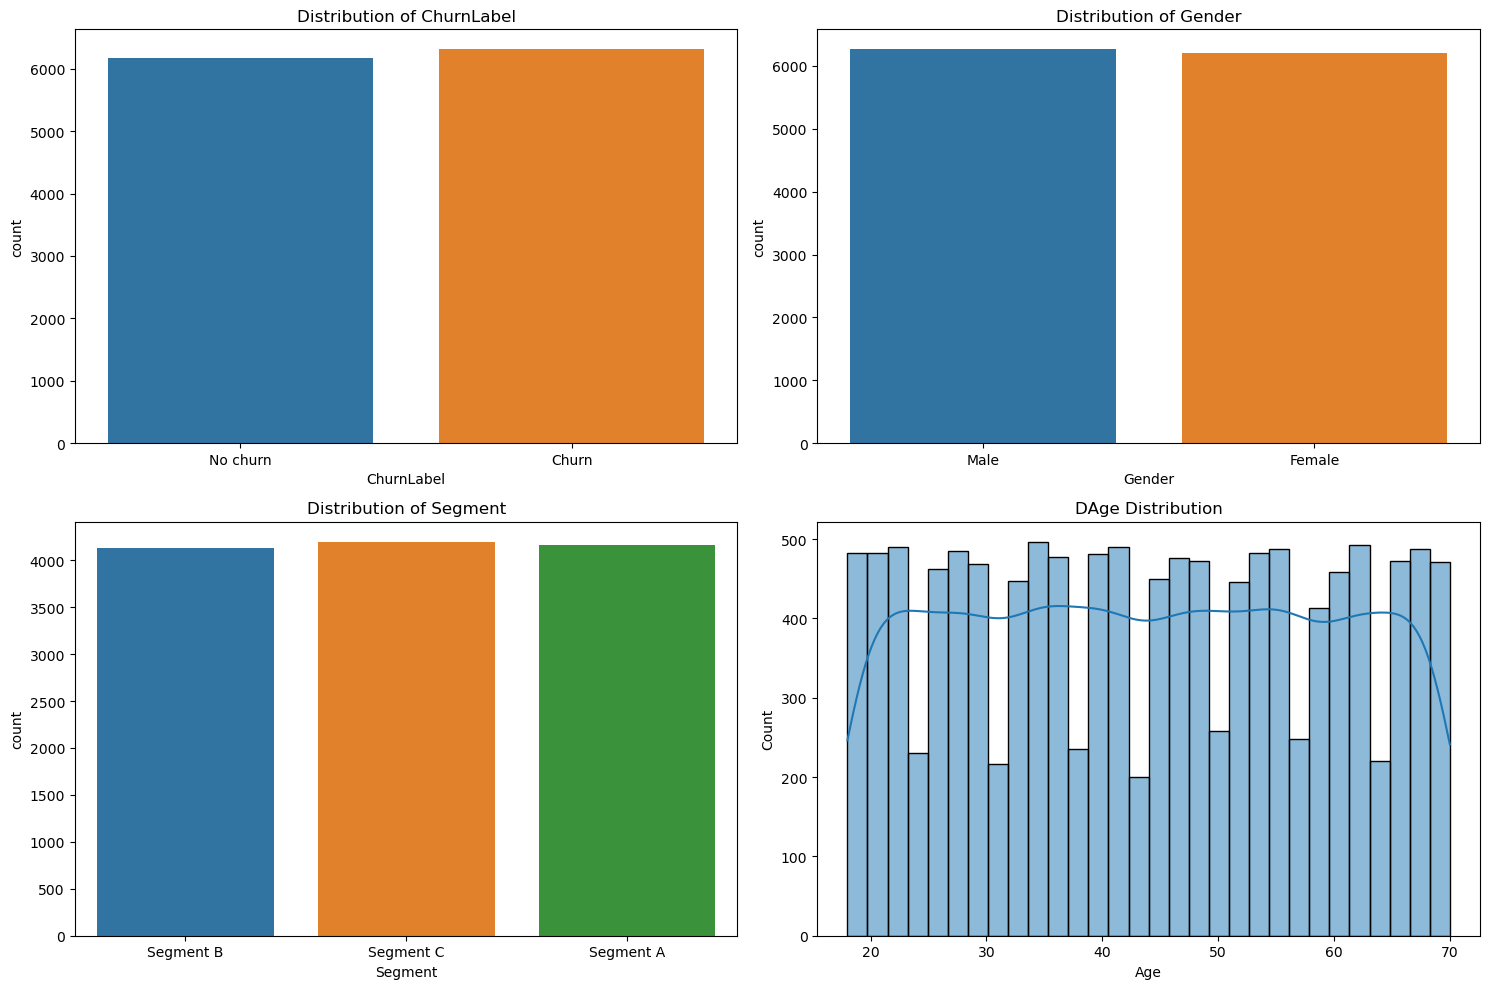

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

#distribution of the churn
sns.countplot(x='ChurnLabel', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of ChurnLabel')
ax[0, 0].set_xticklabels(['No churn', 'Churn'])

#distribution of the gender
sns.countplot(x='Gender', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Gender')
ax[0, 1].set_xticklabels(['Male', 'Female'])

#distribution of the segment
sns.countplot(x='Segment', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Segment')

#Age Distribution
sns.histplot(df['Age'], bins=30, ax=ax[1, 1], kde=True)
ax[1, 1].set_title('DAge Distribution')

plt.tight_layout()
plt.show()

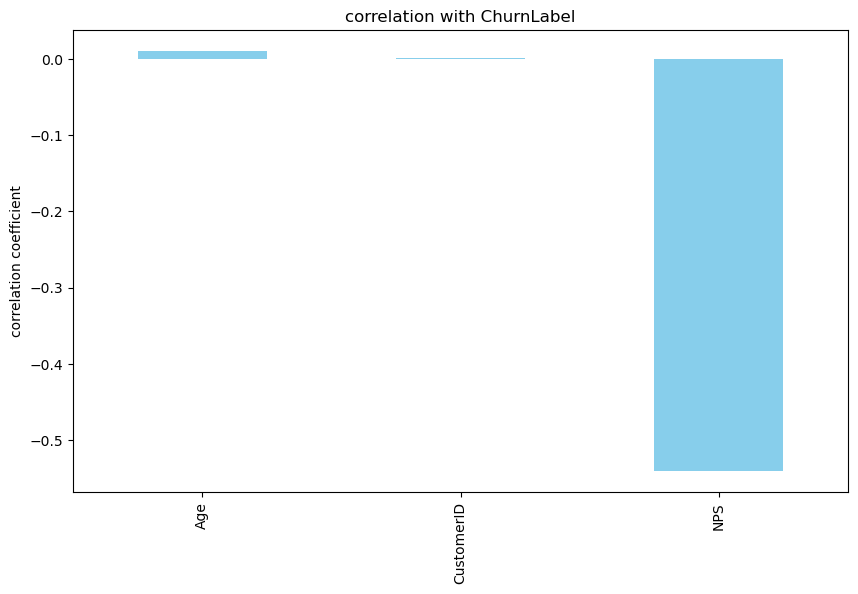

In [23]:
correlation = df.select_dtypes(include=np.number).corr()['ChurnLabel'].sort_values(ascending=False)
plt.figure(figsize =(10, 6))
correlation.drop('ChurnLabel').plot(kind='bar', color='skyblue')
plt.title ('correlation with ChurnLabel')
plt.ylabel('correlation coefficient')
plt.show()

In [24]:
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]


w1, w2 =25, 1000
for col in nested_columns:
    row = [col, df[col][0]]
    print('\n| {:<{w1}} |{:<{w2}}|'.format(*row,w1=w1, w2=w2))


| PurchaseHistory           |[{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [27]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['MonthYear'] = df['Timestamp'].dt.to_period('M')

monthly_churn_rate = df.groupby('MonthYear')['ChurnLabel'].sum()
monthly_churn_rate

MonthYear
2019-01    132
2019-02    139
2019-03    139
2019-04    130
2019-05    124
2019-06    139
2019-07    153
2019-08    127
2019-09    135
2019-10    124
2019-11    137
2019-12    120
2020-01    131
2020-02    137
2020-03    140
2020-04    135
2020-05    132
2020-06    115
2020-07    149
2020-08    139
2020-09    147
2020-10    140
2020-11    128
2020-12    142
2021-01    137
2021-02    101
2021-03    124
2021-04    138
2021-05    127
2021-06    128
2021-07    148
2021-08    118
2021-09    125
2021-10    136
2021-11    121
2021-12    122
2022-01    113
2022-02    124
2022-03    137
2022-04    118
2022-05    136
2022-06    116
2022-07    133
2022-08    162
2022-09    121
2022-10    127
2022-11    138
2022-12    130
Freq: M, Name: ChurnLabel, dtype: int64

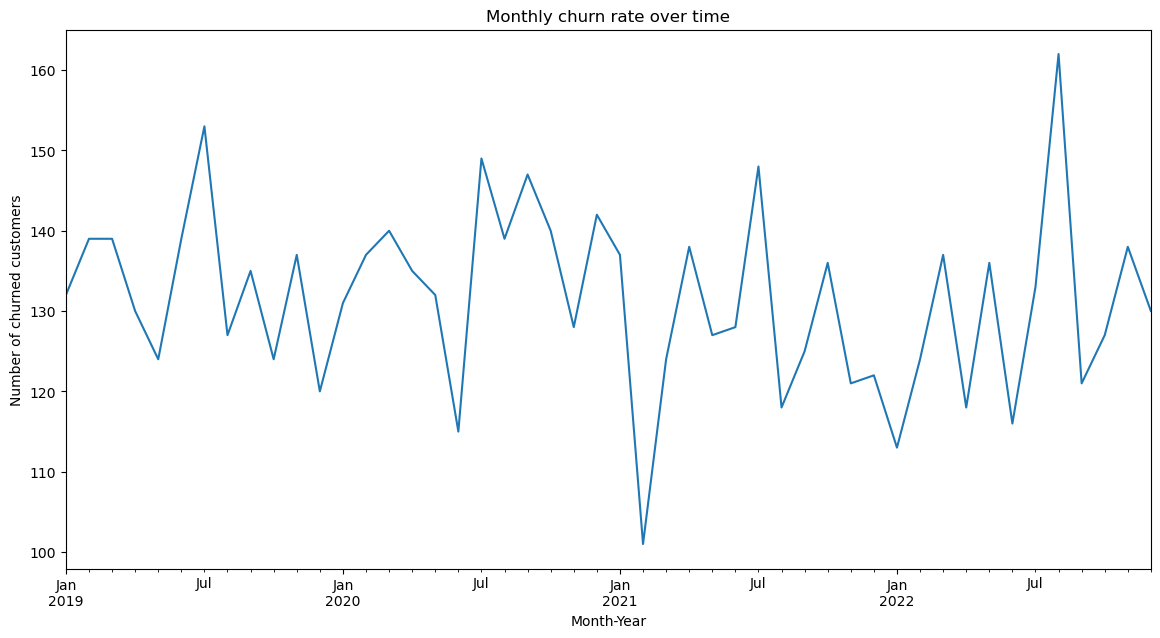

In [28]:
plt.figure(figsize=(14,7))
monthly_churn_rate.plot()
plt.title('Monthly churn rate over time')
plt.ylabel('Number of churned customers')
plt.xlabel('Month-Year')
plt.show()

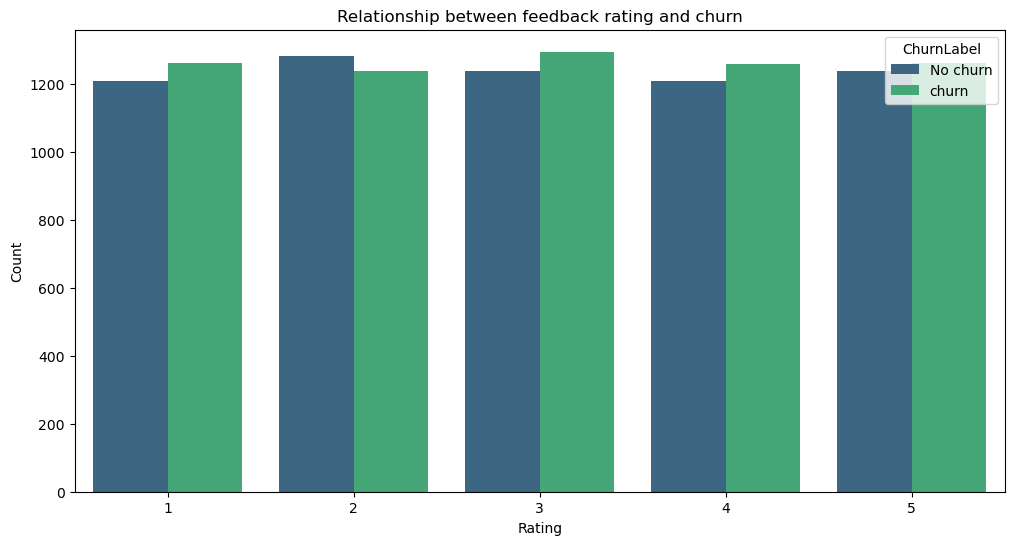

In [29]:
df['FeedbackRating'] = df['Feedback'].apply(lambda x: eval(x)['Rating'])

plt.figure(figsize=(12, 6))
sns.countplot(x='FeedbackRating', data=df, hue='ChurnLabel', palette='viridis')
plt.title('Relationship between feedback rating and churn')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='ChurnLabel', loc='upper right', labels=['No churn', 'churn'])
plt.show()

# #Data preprocessing and feature extraction

In [34]:
for feature in nested_columns:
    df[feature] = df[feature].apply(literal_eval)


In [36]:
#PurchaseHistory
df['PurchasedProducts'] = df['PurchaseHistory'].apply(lambda x: '|'.join([i['Product'] for i in x]))
df['PurchaseFrequency'] = df['PurchaseHistory'].apply(lambda x: sum([i['Frequency'] for i in x]))
df['PurchaseValue'] = df['PurchaseHistory'].apply(lambda x: sum([i['Value'] for i in x]))

#SubscriptionPlan
df['SubscriptionPlan'] = df['SubscriptionDetails'].apply(lambda x: x['Plan'])
df['SubscriptionStartDate'] = df['SubscriptionDetails'].apply(lambda x: x['Start_Date'])
df['SubscriptionEndDate'] = df['SubscriptionDetails'].apply(lambda x: x['End_Date'])
df['SubscriptionDuration'] = (pd.to_datetime(df['SubscriptionEndDate'])-pd.to_datetime(df['SubscriptionStartDate'])).dt.days

#WebsiteUsage
df['WebsitePageViews'] = df['WebsiteUsage'].apply(lambda x: x['PageViews'])
df['WebsiteTimeSpent'] = df['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)'])

#EngagementMetrics
df['EngagementMetricsLogins'] = df['EngagementMetrics'].apply(lambda x: x['Logins'])
df['EngagementMetricsFrequency'] = df['EngagementMetrics'].apply(lambda x: x['Frequency'])

#Feedback
df['FeedbackRating'] = df['Feedback'].apply(lambda x: x['Rating'])
df['FeedbackComment'] = df['Feedback'].apply(lambda x: x['Comment'])


In [38]:
# Adding number of emails in the MarketingCommunication field
df['MarketingCommunicationNoOfEmails'] = df['MarketingCommunication'].apply(
    lambda x: len(x)
)

# Calculating the average time difference between Email_Clicked and Email_Opened
df['MarketingCommunicationOpenClickDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Clicked']) - pd.to_datetime(i['Email_Opened'])).days 
        for i in x
    ])
)

# Calculating the average time difference between Email_Opened and Email_Sent
df['MarketingCommunicationSentOpenDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Opened']) - pd.to_datetime(i['Email_Sent'])).days 
        for i in x
    ])
)


In [41]:
service_interaction_types = df['ServiceInteractions'].apply(lambda x: list(set([i['Type'] for i in x])))
service_interaction_types = service_interaction_types.to_list()
unique_service_interaction_type = []
for i in service_interaction_types:
    unique_service_interaction_type.extend(i)
unique_service_interaction_type = list(set(unique_service_interaction_type))
print('All unique service interaction types:', unique_service_interaction_type)

All unique service interaction types: ['Call', 'Chat', 'Email']


In [42]:
payment_history_methods = df['PaymentHistory'].apply(lambda x: list(set([i['Method'] for i in x])))
payment_history_methods = payment_history_methods.to_list()
unique_payment_history_methods = []
for i in payment_history_methods:
    unique_payment_history_methods.extend(i)
unique_payment_history_methods = list(set(unique_payment_history_methods))
print('All unique payment history methods:', unique_payment_history_methods)

All unique payment history methods: ['PayPal', 'Credit Card', 'Bank Transfer']


In [44]:
clickstream_data_actions = df['ClickstreamData'].apply(lambda x: list(set([i['Action'] for i in x])))
clickstream_data_actions = clickstream_data_actions.to_list()
unique_clickstream_data_actions = []
for i in clickstream_data_actions:
    unique_clickstream_data_actions.extend(i)
unique_clickstream_data_actions = list(set(unique_clickstream_data_actions))
print('All unique click stream data actions:', unique_clickstream_data_actions)

All unique click stream data actions: ['Add to Cart', 'Search', 'Click']


In [49]:
for usit in unique_service_interaction_type:
    df[f'ServiceInteractions_{usit}'] = df['ServiceInteractions'].apply(lambda x: len([i for i in x if i ['Type']==usit]))
    
df['PaymentHistoryNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: sum(i['Late_Payments'] for i in x))

df['PaymentHistoryAvgNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: np.mean([i['Late_Payments'] for i in x]))

for ucda in unique_clickstream_data_actions:
    df[f'ClickStreamData_{ucda}'] = df['ClickstreamData'].apply(lambda x: len([i for i in x if i ['Action']==ucda]))

In [50]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Chat,ServiceInteractions_Email,PaymentHistoryNoOfLatePayments,PaymentHistoryAvgNoOfLatePayments,ClickStreamData_Add to Cart,ClickStreamData_Search,ClickStreamData_Click
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,319.0,818.0,1,2,1,40,13.333333,8,12,4
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,88.0,110.0,5,4,10,10,3.333333,8,7,9
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,117.0,333.0,1,1,1,8,2.666667,2,7,3
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,423.0,159.0,17,24,18,79,26.333333,15,16,16
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,96.0,193.0,4,1,5,2,0.666667,17,4,9


In [51]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'FeedbackRating', 'PurchasedProducts', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'SubscriptionStartDate',
       'SubscriptionEndDate', 'SubscriptionDuration', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackComment',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Call',
       'ServiceInteractions_Chat', 'ServiceInteractions_Email',
       'PaymentHistoryNoOfLatePayments', 'PaymentHistoryAvgNoOfLatePayments',
       'ClickStreamData_Ad

In [57]:
df_ = df.drop(columns=[
    'CustomerID',
    'Name',
    'Location',
    'Email',
    'Phone',
    'Address',
    'Segment',
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication',
    'Timestamp',
    'MonthYear',
    'PurchasedProducts',
    'SubscriptionStartDate',
    'SubscriptionEndDate',
    'FeedbackComment'
])


In [58]:
df_.columns

Index(['Age', 'Gender', 'NPS', 'ChurnLabel', 'FeedbackRating',
       'PurchaseFrequency', 'PurchaseValue', 'SubscriptionPlan',
       'SubscriptionDuration', 'WebsitePageViews', 'WebsiteTimeSpent',
       'EngagementMetricsLogins', 'EngagementMetricsFrequency',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Call',
       'ServiceInteractions_Chat', 'ServiceInteractions_Email',
       'PaymentHistoryNoOfLatePayments', 'PaymentHistoryAvgNoOfLatePayments',
       'ClickStreamData_Add to Cart', 'ClickStreamData_Search',
       'ClickStreamData_Click'],
      dtype='object')

In [59]:
df_.head()

,Age,Gender,NPS,ChurnLabel,FeedbackRating,PurchaseFrequency,PurchaseValue,SubscriptionPlan,SubscriptionDuration,WebsitePageViews,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Chat,ServiceInteractions_Email,PaymentHistoryNoOfLatePayments,PaymentHistoryAvgNoOfLatePayments,ClickStreamData_Add to Cart,ClickStreamData_Search,ClickStreamData_Click
0,31,Male,3,1,1,38,3994.72,Express,871,49,...,319.0,818.0,1,2,1,40,13.333333,8,12,4
1,66,Female,6,0,2,4,2844.35,Pro,290,100,...,88.0,110.0,5,4,10,10,3.333333,8,7,9
2,36,Female,3,0,4,14,1866.52,Essential,319,1,...,117.0,333.0,1,1,1,8,2.666667,2,7,3
3,62,Female,1,1,1,28,1378.64,Smart,803,25,...,423.0,159.0,17,24,18,79,26.333333,15,16,16
4,68,Female,3,0,3,39,2425.05,Basic,580,77,...,96.0,193.0,4,1,5,2,0.666667,17,4,9


In [62]:
print('Total Dataset length: ', len(df_))
df_[['Gender', 'SubscriptionPlan', 'EngagementMetricsFrequency']].nunique()

Total Dataset length:  12483


Gender                         2
SubscriptionPlan              20
EngagementMetricsFrequency     3
dtype: int64

In [63]:
gender_map = {'Male': 0, 'Female': 1}
unique_subscription_plans = df_['SubscriptionPlan'].unique()

subscription_plan_map = {unique_subscription_plans[i]: i for i in range (len(unique_subscription_plans))}

unique_engagement_frequency = df_['EngagementMetricsFrequency'].unique()
engagement_frequency_map = {unique_engagement_frequency[i]: i for i in range (len(unique_engagement_frequency))}

In [64]:
df_.loc[:, 'Gender'] = df_.loc[:, 'Gender'].map(gender_map)
df_.loc[:, 'SubscriptionPlan'] = df_.loc[:, 'SubscriptionPlan'].map(subscription_plan_map)
df_.loc[:, 'EngagementMetricsFrequency'] = df_.loc[:, 'EngagementMetricsFrequency'].map(engagement_frequency_map)

In [65]:
df_.loc[0]

Age                                      31.000000
Gender                                    0.000000
NPS                                       3.000000
ChurnLabel                                1.000000
FeedbackRating                            1.000000
PurchaseFrequency                        38.000000
PurchaseValue                          3994.720000
SubscriptionPlan                          0.000000
SubscriptionDuration                    871.000000
WebsitePageViews                         49.000000
WebsiteTimeSpent                         15.000000
EngagementMetricsLogins                  19.000000
EngagementMetricsFrequency                0.000000
MarketingCommunicationNoOfEmails          8.000000
MarketingCommunicationOpenClickDiff     319.000000
MarketingCommunicationSentOpenDiff      818.000000
ServiceInteractions_Call                  1.000000
ServiceInteractions_Chat                  2.000000
ServiceInteractions_Email                 1.000000
PaymentHistoryNoOfLatePayments 

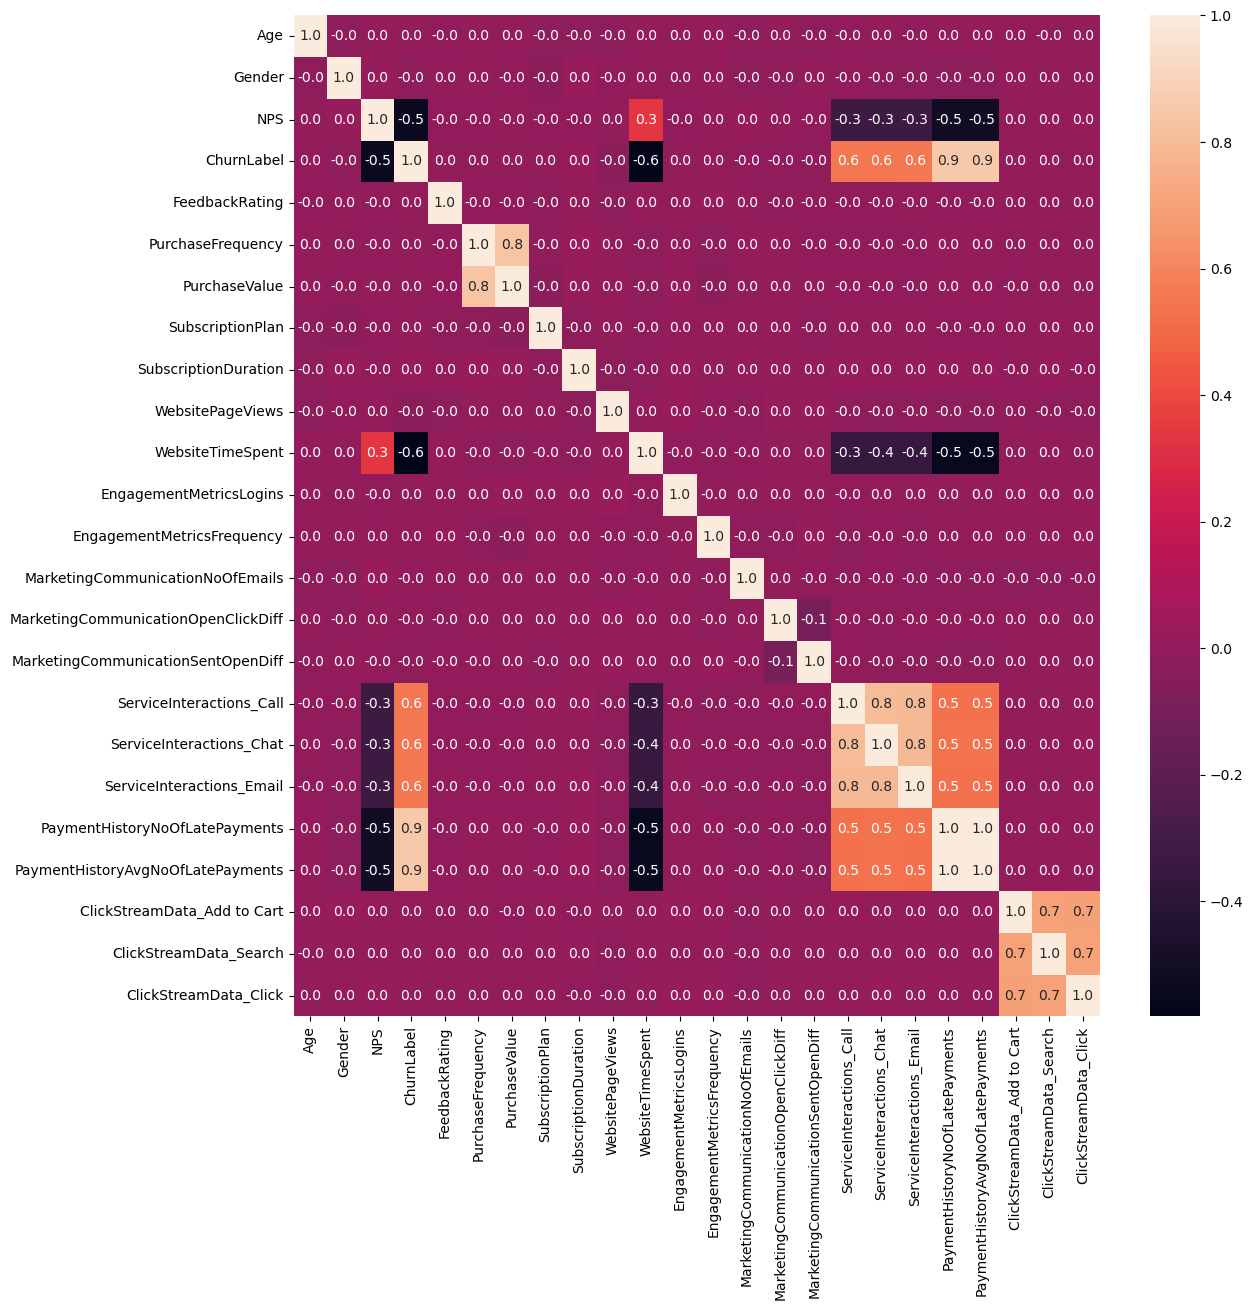

In [66]:
df_corr = df_.corr()
fig, ax = plt.subplots(figsize= (13, 13))
sns.heatmap(df_corr, annot = True, fmt = '.1f', ax=ax)
plt.show()

In [67]:
X = df_.drop(columns=['ChurnLabel'])
y = df_['ChurnLabel']
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size = 0.8, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size = 0.3, random_state = 42)

In [68]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [69]:
def evaluate (X, y, model, subset=''):
    y_pred = model.predict(X)
    print(f'{subset} Accuracy_score: {accuracy_score(y_pred,y)}')
    print(f'{subset} Precision_score: {precision_score(y_pred,y)}')
    print(f'{subset} Recall_score: {recall_score(y_pred,y)}')
    print(f'{subset} F1_score: {f1_score(y_pred,y)}')

In [74]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

evaluate(X_train, y_train, lr, 'Train')
print(f'\n')
evaluate(X_val, y_val, lr, 'Validation')

Train Accuracy_score: 0.9709593430803124
Train Precision_score: 0.965938176806458
Train Recall_score: 0.9767071471232331
Train F1_score: 0.9712928133042962


Validation Accuracy_score: 0.968
Validation Precision_score: 0.9696969696969697
Validation Recall_score: 0.9643835616438357
Validation F1_score: 0.967032967032967


# Evaluation on the Train Set

In [76]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

evaluate(X_train, y_train, dt, 'Train')
print(f'\n')
evaluate(X_val, y_val, dt, 'Validation')

Train Accuracy_score: 0.9768676146605247
Train Precision_score: 0.9769639692852924
Train Recall_score: 0.9775413711583925
Train F1_score: 0.9772525849335302


Validation Accuracy_score: 0.9693333333333334
Validation Precision_score: 0.9724517906336089
Validation Recall_score: 0.9644808743169399
Validation F1_score: 0.9684499314128944


# Evaluation on the test set

In [78]:
evaluate(X_test, y_test, lr, 'Logistic Regression Test')
print(f'\n')
evaluate(X_test, y_test, dt, 'Decision Tree Test')

Logistic Regression Test Accuracy_score: 0.9690898683457355
Logistic Regression Test Precision_score: 0.9644495412844036
Logistic Regression Test Recall_score: 0.9733796296296297
Logistic Regression Test F1_score: 0.9688940092165897


Decision Tree Test Accuracy_score: 0.9730967372638809
Decision Tree Test Precision_score: 0.9724770642201835
Decision Tree Test Recall_score: 0.9735935706084959
Decision Tree Test F1_score: 0.9730349971313826


# Confusion Matrix For Logistic Regression

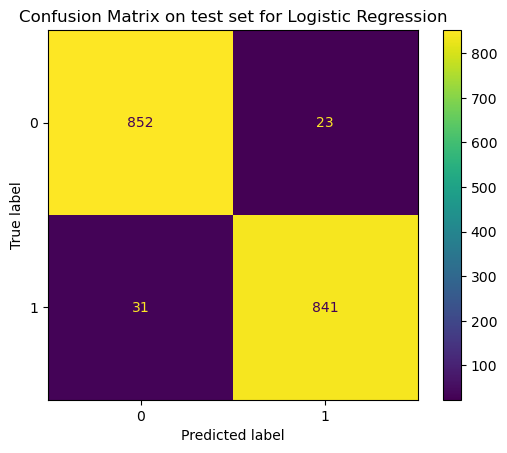

In [81]:
lr_y_pred = lr.predict(X_test)
logistic_regression_confusion_matrix = confusion_matrix(y_test, lr_y_pred)
display = ConfusionMatrixDisplay(confusion_matrix = logistic_regression_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on test set for Logistic Regression')
plt.show()

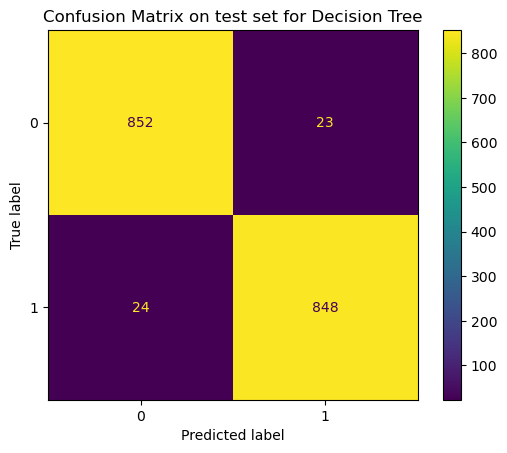

In [82]:
dt_y_pred = dt.predict(X_test)
decision_tree_confusion_matrix = confusion_matrix(y_test, dt_y_pred)
display = ConfusionMatrixDisplay(confusion_matrix = decision_tree_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on test set for Decision Tree')
plt.show()